In [1]:
import typing as tp
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

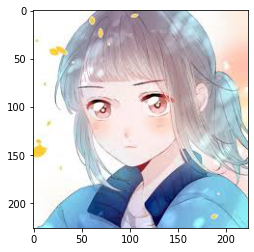

In [2]:
with Image.open('picture.jpg') as image:
    plt.imshow(image)

In [3]:
def encode(image: Image, message: str) -> Image:
    image_array = np.moveaxis(np.array(image, dtype='uint8'), -1, 0)
    arr = image_array.flatten()
    encoded_message = message.encode('UTF-8')
    curr = 0
    for byte in encoded_message:
        for i in range(8):
            arr[curr] -= (arr[curr] & 1)
            if (byte & (1 << i)) > 0:
                arr[curr] += 1
            curr += 1
                
    return Image.fromarray(np.moveaxis(arr.reshape(image_array.shape), 0, -1))


def decode(image: Image, message_length: int) -> str:
    image_array = np.moveaxis(np.array(image, dtype='uint8'), -1, 0)
    arr = image_array.flatten()
    result = []
    for i in range(message_length):
        curr = 0
        for j in range(7, -1, -1):
            curr = (curr << 1) + (arr[i * 8 + j] & 1)
        result.append(chr(curr))
    return ''.join(result)

In [4]:
with open('message.txt', 'r') as f:
    message = f.read()

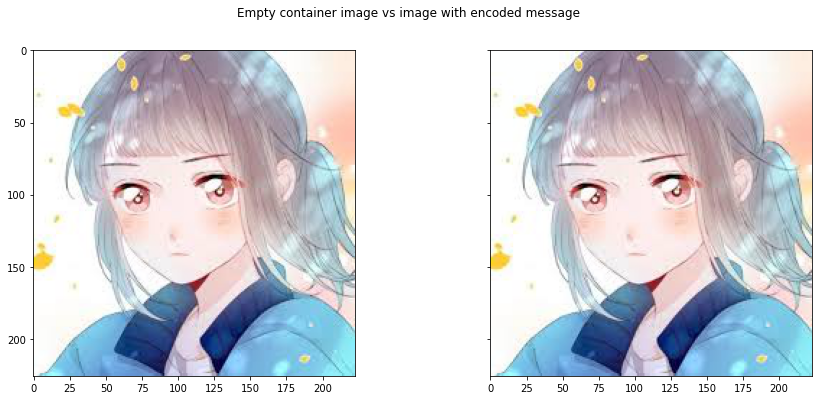

In [5]:
with Image.open('picture.jpg') as image:
    image_with_message = encode(image, message)
    decoded_message = decode(image_with_message, len(message))
    fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey='all')
    fig.suptitle('Empty container image vs image with encoded message')
    axes[0].imshow(image)
    axes[1].imshow(image_with_message)
    plt.show()

In [6]:
with open('decoded_message.txt', 'w') as f:
    f.writelines(decoded_message)